#  credit card Approvals Prediction

In [1]:
pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=2b494cb62a976c1f828832e03b7d6ce6f71a342c15a1df737fe51ed9ab6e2e91
  Stored in directory: c:\users\w9558783\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


## Process involves in this project
#### 1 Data Pre-processing
#### 2 Data wrangling
#### 3 Data splitting
#### 4 Explotary data analysis
#### 5 univariate and multivariate analysis
#### 6 Feature selection
#### 7 ANN
#### 8 Random Forest
#### 9 SVM
#### 10 Feature scaling
#### 11 Hyperparameter Tuning

In [2]:
import numpy as np # linear algebra
import pandas as pd # data analysis and data manipulation
import matplotlib.pyplot as plt # data vizualization
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
plt.rcParams['figure.figsize'] = (10, 8)
font_fmt = {'fontweight': 'bold',
           'fontsize': 20}

In [3]:
# Save crx dataset in data
data = pd.read_csv("crx.csv", header = None) # read csv
data.head(10) # display top 10 records

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.500,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180,314,+
9,b,42.5,4.915,y,p,w,v,3.165,t,f,0,t,g,52,1442,+


In [4]:
# Shape and preview
print('Shape of Dataset :', data.shape)


Shape of Dataset : (1128, 16)


# Data Cleaning and Pre-Processing

In [5]:
# Rename all columns
data.columns = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer','Industry','Ethnicity','Experience','Default','Employed','CreditScore','DriversLicense','Citizen','ZipCode','Income','Approved']

In [6]:
#Calculate missing values
df=pd.DataFrame(columns = ['Feature', 'NumberMissing', 'PercentageMissing'])
for col in data.columns:
    df=df.append({'Feature':col, 'NumberMissing':(data[col]=='?').sum(), 'PercentageMissing': np.round(100*(data[col]=='?').sum()/len(data),2)},  ignore_index=True)

# Show dataframe
df

,Feature,NumberMissing,PercentageMissing
0,Gender,20,1.77
1,Age,18,1.60
2,Debt,0,0.00
3,Married,10,0.89
4,BankCustomer,10,0.89
5,Industry,16,1.42
6,Ethnicity,16,1.42
7,Experience,0,0.00
8,Default,0,0.00
9,Employed,0,0.00


### Gender preprocessing

In [7]:
data['Gender'].value_counts()

b    774
a    334
?     20
Name: Gender, dtype: int64

In [8]:
# Rename records
data['Gender'].replace('a', 0, inplace=True)
data['Gender'].replace('b', 1, inplace=True)



In [9]:
# Fill missing values with mode methods
data['Gender'].replace('?', 1, inplace=True)

# Convert into integer 
data['Gender']=data['Gender'].astype(int)

### Age Preprocessing

In [10]:
# Identify median age
median_age=data.loc[data['Age']!='?','Age'].median()
print('Median age of customer', median_age)



Median age of customer 29.25


In [11]:

# Fill missing values with median
data.loc[data['Age']=='?','Age']=median_age

# Convert to float type
data['Age']=data['Age'].astype(float)

### Married pre-processing

In [12]:
data['Married'].value_counts()

u    860
y    256
?     10
l      2
Name: Married, dtype: int64

In [13]:
# single (y)
# married (u) 
# divorced (l).

In [14]:
# Filling missing values with mode  ( married)
data.loc[data['Married']=='?','Married']='u'


In [15]:
# Combining diversed with single
data.loc[data['Married']=='l','Married']='y'


In [16]:
# Convert into binary form 
# u=Married, 
# y=Single/Divorced
data.loc[data['Married']=='u','Married']=1
data.loc[data['Married']=='y','Married']=0


In [17]:
# Convert to int type
data['Married']=data['Married'].astype(int)

### BankCustomer pre-processing

In [18]:
data['BankCustomer'].value_counts()

g     860
p     256
?      10
gg      2
Name: BankCustomer, dtype: int64

In [19]:
# g = having a bank account 
# p = not having a bank account 

In [20]:
# Filling missing values with mode(g)
data.loc[data['BankCustomer']=='?','BankCustomer']='g'

In [21]:
# Combine gg records with g because it has  2 entries
data.loc[data['BankCustomer']=='gg','BankCustomer']='g'

In [22]:
# Convert into binary form
# gg=having bank account,
# p= do not having bank account
data.loc[data['BankCustomer']=='g','BankCustomer']=1
data.loc[data['BankCustomer']=='p','BankCustomer']=0

In [23]:
# Convert into int type
data['BankCustomer']=data['BankCustomer'].astype(int)

### Industry pre-processing

In [24]:
data['Industry'].value_counts()

c     234
q     118
w     108
i      91
aa     90
k      83
ff     77
cc     74
m      66
x      61
d      53
e      40
?      16
j      11
r       6
Name: Industry, dtype: int64

In [25]:
#c':'Energy'
#'q':'Materials',
#'w':'Industrials',
#'i':'ConsumerDiscretionary',
#'aa':'ConsumerStaples',
#'ff':'Healthcare',
#'k':'Financials','
#cc':'InformationTechnology',
#'m':'CommunicationServices',
#'x':'Utilities',
#'d':'Real Estate',
#'e':'Education',
#'j':'Research',
#'r':'Transport'

In [26]:
# Filling missing values with mode (c)
data.loc[data['Industry']=='?','Industry']='c'

# Rename categorial records
data['Industry'].replace({'c':'Energy','q':'Materials','w':'Industrials','i':'ConsumerDiscretionary','aa':'ConsumerStaples','ff':'Healthcare','k':'Financials','cc':'InformationTechnology','m':'CommunicationServices','x':'Utilities','d':'Real Estate','e':'Education','j':'Research','r':'Transport'}, inplace=True)

In [27]:
# Ethnicity pre-processing

In [28]:
data['Ethnicity'].value_counts()

v     655
h     245
bb     92
ff     83
?      16
z      11
j      11
n       7
dd      6
o       2
Name: Ethnicity, dtype: int64

In [29]:
# Filling missing values with mode(v)
data.loc[data['Ethnicity']=='?','Ethnicity']='v'

In [30]:
# Combining all minority groups into single entities(other)
data.loc[data['Ethnicity'].isin(['j','z','dd','n','o']),'Ethnicity']='Other'

In [31]:
# Rename categories into different ethnicity
data['Ethnicity'].replace({'v':'White','h':'Black','bb':'Asian','ff':'Latino'}, inplace=True)

### Default pre-processing

In [32]:
# Renaming records
data['Default'].replace('t', 1, inplace=True)
data['Default'].replace('f', 0, inplace=True)

### Employed pre- processing

In [33]:
# Rename entries
data['Employed'].replace('t', 1, inplace=True)
data['Employed'].replace('f', 0, inplace=True)

### DriversLicense pre-processing

In [34]:
# Renaming records
data['DriversLicense'].replace('t', 1, inplace=True)
data['DriversLicense'].replace('f', 0, inplace=True)

### Citizen pre-processing

In [35]:
data['Citizen'].value_counts()

g    1031
s      85
p      12
Name: Citizen, dtype: int64

In [36]:
# citizen by birth (g),
# citizen by other  (s)
# temporary citizen (p).

In [37]:
# Renaming entities
data['Citizen'].replace('g', 'ByBirth', inplace=True)
data['Citizen'].replace('s', 'ByOtherMeans', inplace=True)
data['Citizen'].replace('p', 'Temporary', inplace=True)

### zipcode pre-processing

In [38]:
data['ZipCode'].value_counts()

0      228
160     59
200     56
120     56
80      47
      ... 
56       1
21       1
371      1
254      1
178      1
Name: ZipCode, Length: 171, dtype: int64

In [39]:
# Filling missing values with mode (00000)
data.loc[data['ZipCode']=='?','ZipCode']='00000'

### Approved pre-processing

In [40]:
data['Approved'].value_counts()

-    604
+    524
Name: Approved, dtype: int64

In [41]:
# 1 is approved,
# 0 is not approved

In [42]:
# Renaming entities 
data['Approved'].replace('-', 0, inplace=True)
data['Approved'].replace('+', 1, inplace=True)

###  Preview final data

In [43]:

data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,Experience,Default,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [44]:
# Data types
data.dtypes

Gender              int32
Age               float64
Debt              float64
Married             int32
BankCustomer        int32
Industry           object
Ethnicity          object
Experience        float64
Default             int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Citizen            object
ZipCode            object
Income              int64
Approved            int64
dtype: object

### Saving dataset in csv

In [45]:
# Save to csv
data.to_csv('cleaneddata.csv',index=False)

In [46]:
print()
print(data.columns)
print()


Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'Experience', 'Default', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')



In [47]:
print()
print(f'Number of records: {data.shape[0]}\nNumber of columns: {data.shape[1]}')
print()


Number of records: 1128
Number of columns: 16



# Exploratory data analysis

### Univariate analysis

In [48]:
# getting n uniques of columns
column = ['Gender', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'Default', 'Employed',
       'DriversLicense', 'Citizen', 'Approved']


for i in column :
    print('\n')
    print(f'....... {i} ........')
    print(data[i].unique())
    print('\n')



....... Gender ........
[1 0]




....... Married ........
[1 0]




....... BankCustomer ........
[1 0]




....... Industry ........
['Industrials' 'Materials' 'CommunicationServices' 'Transport'
 'InformationTechnology' 'Financials' 'Energy' 'Real Estate' 'Utilities'
 'ConsumerDiscretionary' 'Education' 'ConsumerStaples' 'Healthcare'
 'Research']




....... Ethnicity ........
['White' 'Black' 'Asian' 'Latino' 'Other']




....... Default ........
[1 0]




....... Employed ........
[1 0]




....... DriversLicense ........
[0 1]




....... Citizen ........
['ByBirth' 'ByOtherMeans' 'Temporary']




....... Approved ........
[1 0]




In [49]:
# checking null 
print(f'Number of missing values: {data.isnull().values.sum()}')


Number of missing values: 0


In [50]:
# segregate numeric , boolean and string columns
numeric = ['Age', 'Debt', 'Experience', 'CreditScore', 'Income']
boolean = ['Gender', 'Married', 'BankCustomer', 'Default', 'Employed', 'DriversLicense', 'Approved']
string = ['Industry', 'Ethnicity', 'Citizen']

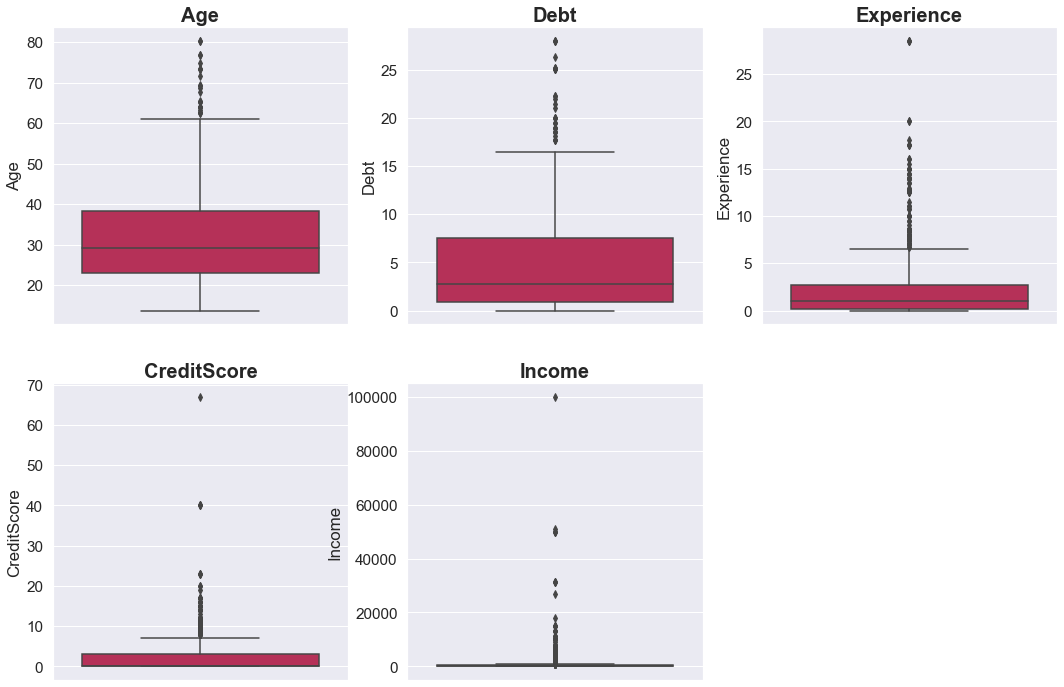

In [51]:
# visualize the numeric columns in box plot
plt.figure(figsize=(18, 12))
# using for loop
for i, plot in enumerate(numeric):
    plt.subplot(int(f'23{i+1}')) # subplot location
    plt.title(f'{plot}', fontdict=font_fmt) # title
    plt.subplots_adjust(hspace=0.2)
    sns.boxplot(data=data, y=plot,palette="rocket") # boxplot

In [52]:
# statistical approach using describe function
for col in numeric:
    # using for loop
    print(f'--- {col} ---')
    print(data[col].describe()) # printing describe
    print('\n')

--- Age ---
count    1128.000000
mean       31.782668
std        11.648351
min        13.750000
25%        22.920000
50%        29.250000
75%        38.250000
max        80.250000
Name: Age, dtype: float64


--- Debt ---
count    1128.000000
mean        4.777345
std         5.081004
min         0.000000
25%         0.875000
50%         2.750000
75%         7.500000
max        28.000000
Name: Debt, dtype: float64


--- Experience ---
count    1128.000000
mean        2.226073
std         3.389324
min         0.000000
25%         0.198750
50%         1.000000
75%         2.720000
max        28.500000
Name: Experience, dtype: float64


--- CreditScore ---
count    1128.000000
mean        2.465426
std         4.850804
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        67.000000
Name: CreditScore, dtype: float64


--- Income ---
count      1128.000000
mean       1013.281028
std        4885.980434
min           0.000000
25%           0.000000
50%   

### Numeric - Bivariate analysis

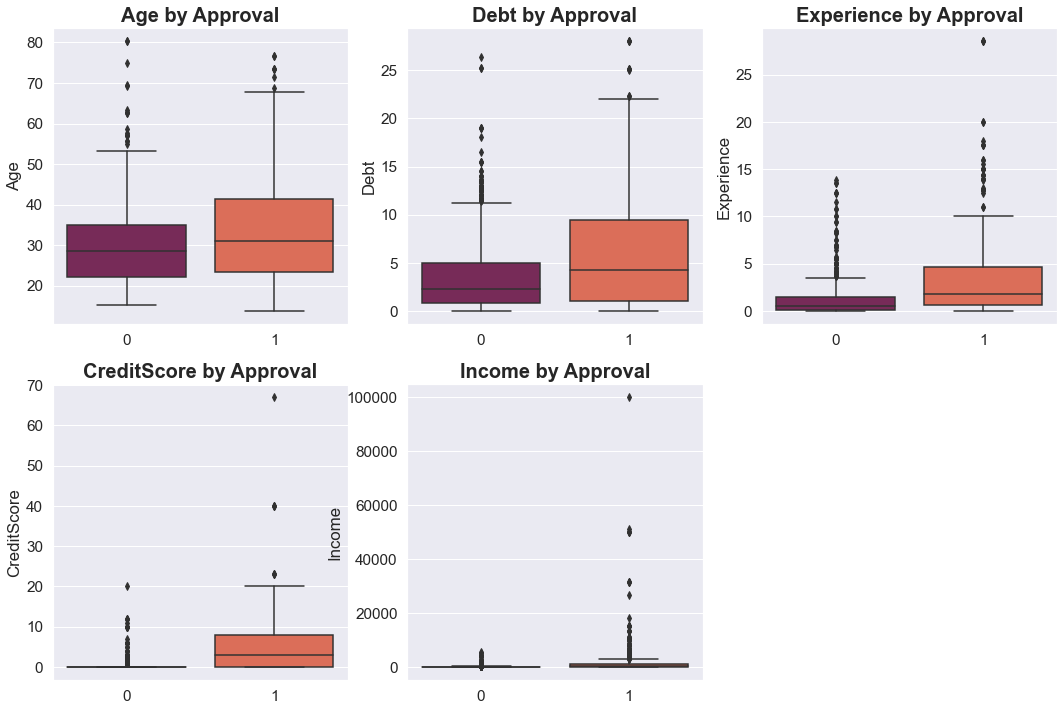

In [53]:
plt.figure(figsize=(18, 12))
# using fpr loop
for i, plot in enumerate(numeric):
    plt.subplot(int(f'23{i+1}')) # subplot location
    plt.title(f'{plot} by Approval', fontdict=font_fmt) # title
    plt.subplots_adjust(hspace=0.2)
    sns.boxplot(data=data, y=plot, x='Approved',palette="rocket") # boxplot
    plt.xlabel('')


plt.show()

In [54]:
# statistical approach for each entities
# using for loop
for col in numeric:
    for a in range(2):
        if a == 0:
            print(f'............. {col} (Not Approved) ..........')
        else:
            print(f'.......{col} (Approved) ........')
        print(data[col][data['Approved']==a].describe())
        print('\n')

............. Age (Not Approved) ..........
count    604.000000
mean      29.936523
std       10.536370
min       15.170000
25%       22.147500
50%       28.540000
75%       35.042500
max       80.250000
Name: Age, dtype: float64


.......Age (Approved) ........
count    524.000000
mean      33.910668
std       12.486505
min       13.750000
25%       23.420000
50%       31.040000
75%       41.352500
max       76.750000
Name: Age, dtype: float64


............. Debt (Not Approved) ..........
count    604.000000
mean       3.881548
std        4.285180
min        0.000000
25%        0.830000
50%        2.250000
75%        5.000000
max       26.335000
Name: Debt, dtype: float64


.......Debt (Approved) ........
count    524.000000
mean       5.809905
std        5.697808
min        0.000000
25%        1.000000
50%        4.250000
75%        9.500000
max       28.000000
Name: Debt, dtype: float64


............. Experience (Not Approved) ..........
count    604.000000
mean       1.299785
std

### Boolean - univariate analysis

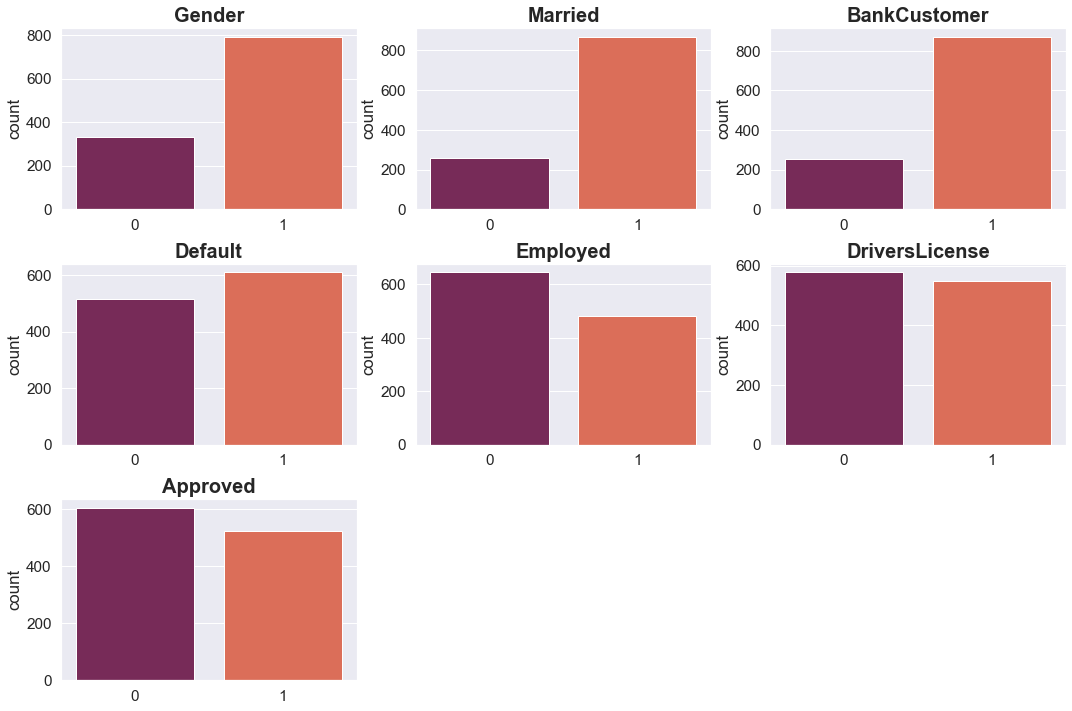

In [55]:
# visualizing boolean categories with countplot
plt.figure(figsize=(18, 12))
# using foe loop
for i, plot in enumerate(boolean):
    plt.subplot(int(f'33{i+1}'))
    plt.title(plot, fontdict=font_fmt)
    plt.subplots_adjust(hspace=0.3)
    sns.countplot(x=data[plot],palette="rocket")
    plt.xlabel('')

### Boolean Bivariate analysis

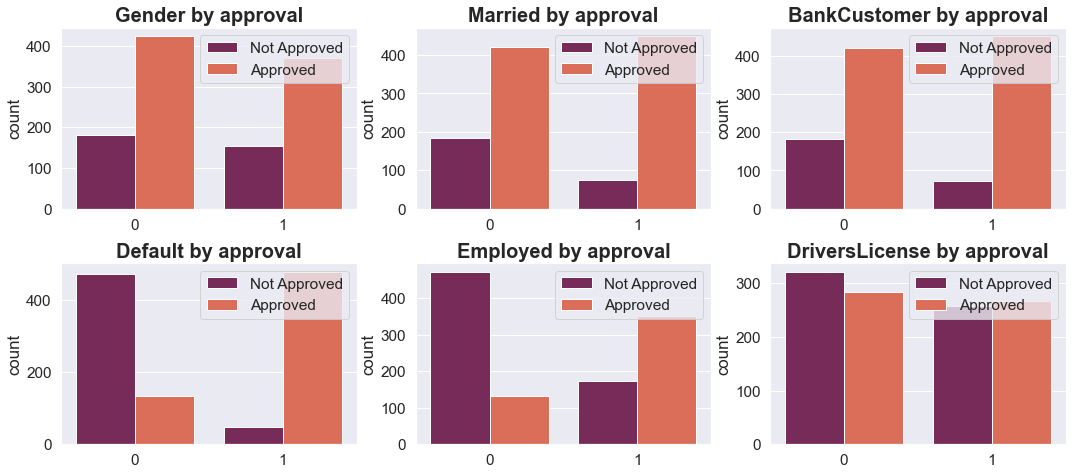

In [56]:
plt.figure(figsize=(18, 12))

for i, plot in enumerate(boolean):
    if plot != 'Approved':
        plt.subplot(int(f'33{i+1}'))
        plt.title(f'{plot} by approval', fontdict=font_fmt)
        plt.subplots_adjust(hspace=0.3)
        sns.countplot(data=data, x='Approved', hue=plot,palette="rocket")
        plt.xlabel('')
        plt.legend(['Not Approved', 'Approved'], loc='upper right')

### String univariate analysis

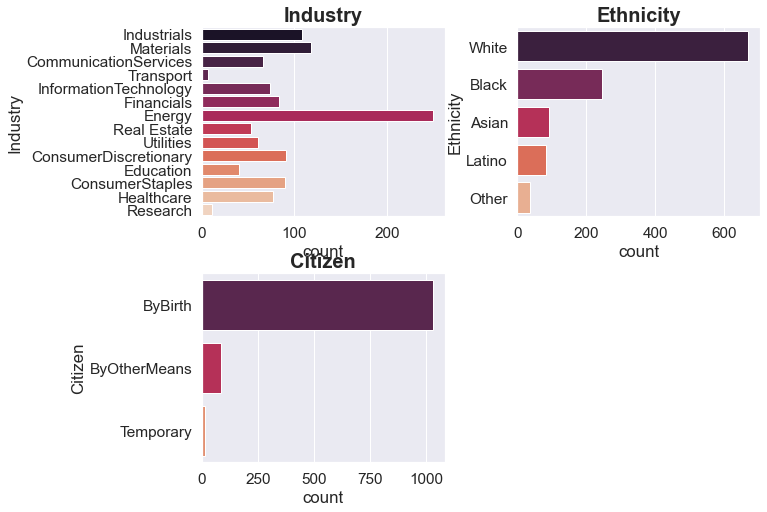

In [57]:
# visualizing string categories in countplot
# using for loop
for i, plot in enumerate(string):
    if plot != 'ZipCode':
        plt.subplot(int(f'22{i+1}'))
        plt.title(f'{plot}', fontdict=font_fmt)
        plt.subplots_adjust(wspace=0.3, hspace=0.3)
        sns.countplot(y=data[plot],palette="rocket")

### String Bivariate analysis

<Figure size 1152x720 with 0 Axes>

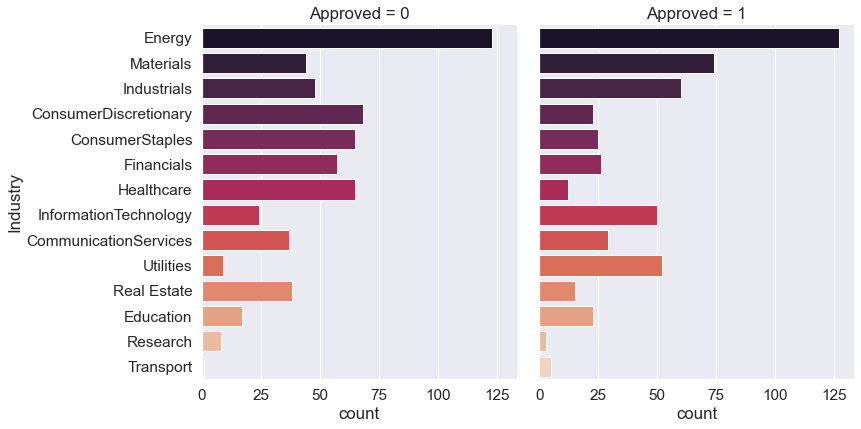

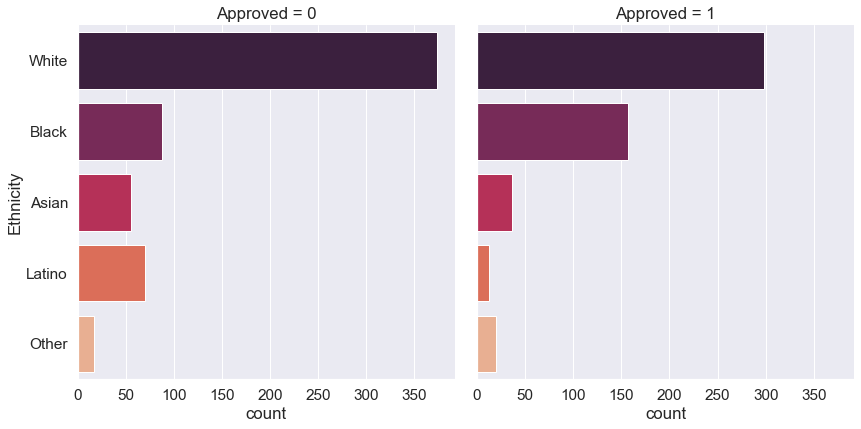

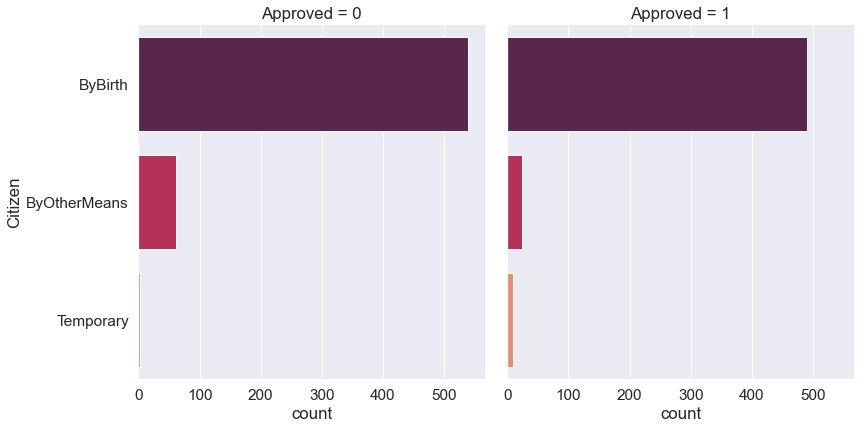

In [58]:
plt.figure(figsize=(16, 10))

for i, plot in enumerate(string):
    sns.catplot(y=plot, col="Approved",
                data=data, kind="count",
                height=6, aspect=1,
                order=data[plot].value_counts().index,palette="rocket")

#### Data Insight


#### According to descriptive data, experience, credit score, and income may influence the likelihood of receiving a credit card;
#### the higher the numbers, the better.
#### PriorDefault and Employed appear to play a role in determining approved status as well.
#### Having a previous default or defaults improves your chances of getting approved.
#### Having a job boosts your chances of getting approved.

# Data Wrangling

In [59]:
# removing ZipCode, Industry, Ethnicity, and Citizenship from the data
# I believe that using this information for credit card approval would be unethical.

data = data.drop(string, axis=1)
data.drop('ZipCode', axis=1, inplace=True)
print(string)
data.head()

['Industry', 'Ethnicity', 'Citizen']


,Gender,Age,Debt,Married,BankCustomer,Experience,Default,Employed,CreditScore,DriversLicense,Income,Approved
0,1,30.83,0.000,1,1,1.25,1,1,1,0,0,1
1,0,58.67,4.460,1,1,3.04,1,1,6,0,560,1
2,0,24.50,0.500,1,1,1.50,1,0,0,0,824,1
3,1,27.83,1.540,1,1,3.75,1,1,5,1,3,1
4,1,20.17,5.625,1,1,1.71,1,0,0,0,0,1


# Feature Selection

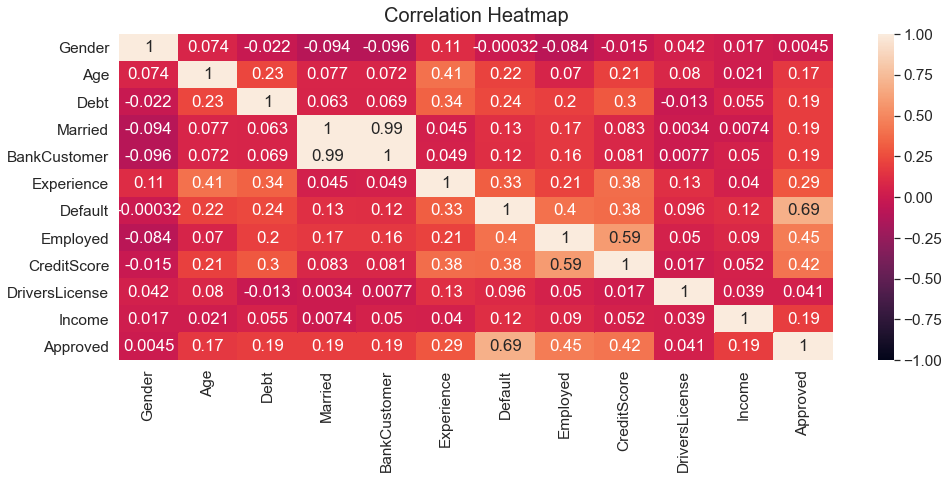

In [60]:
#  Feature selection using co-relation
plt.figure(figsize=(16, 6))#  size of the heatmap.

heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True) # plot in heatmap
# Giving a title to the heatmap. 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);


#### Married is highly corelated with Bankcustomer, both are X value. 
#### thus, we take either of them because both features are doing same thing
#### Default, Experience, Employed, creditscore, income, Bankcustomer are high corealtion with target variable, 
#### so we can use these features for fitting the model

# Splitting the Data

In [61]:
x = data[['BankCustomer', 'Experience', 'Default', 'Employed', 'CreditScore', 'Income']] # assigning x
y=  data.Approved # assigning y 

In [62]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#  Feature Scaling

In [63]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Artificial Neural Network(Classification)

In [64]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers, Model, Sequential, losses, optimizers, utils
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import numpy as np
import pandas as pd


In [65]:
#Initialising ANN
ann = tf.keras.models.Sequential()
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=32,activation="relu"))
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=16,activation="relu"))
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
#1. units:- number of neurons that will be present in the respective layer

#2. activation:- specify which activation function to be used

In [66]:
# Compiling Artificial Neural Network
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [67]:
#Fitting ANN
history=ann.fit(X_train,Y_train,batch_size=32,epochs = 100)
#1.X_train:- Matrix of features for the training dataset

#2.Y_train:- Dependent variable vectors for the training dataset

#3.batch_size: how many observations should be there in the batch. Usually, the value for this parameter is 32 but we can experiment with any other value as well.

#4. epochs: How many times neural networks will be trained. Here the optimal value that I have found from my experience is 100.

Epoch 1/100
29/29 [==============================] - 0s 664us/step - loss: 0.5921 - accuracy: 0.6541
Epoch 2/100
29/29 [==============================] - 0s 928us/step - loss: 0.5042 - accuracy: 0.8182
Epoch 3/100
29/29 [==============================] - 0s 1ms/step - loss: 0.4427 - accuracy: 0.8337
Epoch 4/100
29/29 [==============================] - 0s 977us/step - loss: 0.4023 - accuracy: 0.8359
Epoch 5/100
29/29 [==============================] - 0s 501us/step - loss: 0.3801 - accuracy: 0.8426
Epoch 6/100
29/29 [==============================] - 0s 761us/step - loss: 0.3677 - accuracy: 0.8459
Epoch 7/100
29/29 [==============================] - 0s 458us/step - loss: 0.3606 - accuracy: 0.8503
Epoch 8/100
29/29 [==============================] - 0s 795us/step - loss: 0.3554 - accuracy: 0.8481
Epoch 9/100
29/29 [==============================] - 0s 501us/step - loss: 0.3518 - accuracy: 0.8503
Epoch 10/100
29/29 [==============================] - 0s 818us/step - loss: 0.3498 - accuracy

29/29 [==============================] - 0s 1ms/step - loss: 0.3288 - accuracy: 0.8514
Epoch 82/100
29/29 [==============================] - 0s 775us/step - loss: 0.3285 - accuracy: 0.8537
Epoch 83/100
29/29 [==============================] - 0s 577us/step - loss: 0.3291 - accuracy: 0.8548
Epoch 84/100
29/29 [==============================] - 0s 330us/step - loss: 0.3290 - accuracy: 0.8503
Epoch 85/100
29/29 [==============================] - 0s 662us/step - loss: 0.3300 - accuracy: 0.8559
Epoch 86/100
29/29 [==============================] - 0s 380us/step - loss: 0.3289 - accuracy: 0.8537
Epoch 87/100
29/29 [==============================] - 0s 703us/step - loss: 0.3295 - accuracy: 0.8514
Epoch 88/100
29/29 [==============================] - 0s 444us/step - loss: 0.3282 - accuracy: 0.8514
Epoch 89/100
29/29 [==============================] - 0s 743us/step - loss: 0.3282 - accuracy: 0.8503
Epoch 90/100
29/29 [==============================] - 0s 563us/step - loss: 0.3274 - accuracy: 0.

In [68]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [69]:
#Saving neural network
ann.save("ANN.h5")

In [70]:
print()
scores = ann.evaluate(X_test, Y_test)
print()
print("\n%s: %.2f%%" % (ann.metrics_names[1], scores[1]*100))
print()


8/8 [==============================] - 0s 3ms/step - loss: 0.2839 - accuracy: 0.8584


accuracy: 85.84%



# Hyperparameter Tuning - Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [74]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [75]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_test, Y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [76]:
print(rf_random.best_params_) ## this is the best parameter to achieve max accuracy  

{'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}


In [77]:
print(rf_random.best_estimator_) 

RandomForestClassifier(bootstrap=False, max_depth=70, max_features='sqrt',
                       min_samples_split=5, n_estimators=1600)


In [78]:
rf_random.best_score_

0.8937426900584796

In [79]:
### fitting random forest model with best parameter which randomsearch CV gives
forest = RandomForestClassifier(max_depth=70, max_features='sqrt', min_samples_split=5,min_samples_leaf= 1, 
                       n_estimators=1600)
forest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=70, max_features='sqrt', min_samples_split=5,
                       n_estimators=1600)

In [80]:
###  importing confusion matrix for  evaluating  the accuracy of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [81]:
y_predrf = forest.predict(X_test)## assigning y_prediction for getting accuracy
con_matrix = confusion_matrix(Y_test, y_predrf) ### confusion matrix
print("Confusion Matrix:")
print(con_matrix )
class_report = classification_report(Y_test, y_predrf) ### classification report
print("Classification Report:",)
print (class_report)
acc_score = accuracy_score(Y_test,y_predrf) ### accuracy score
print("Accuracy:",acc_score)

Confusion Matrix:
[[119   7]
 [  8  92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       126
           1       0.93      0.92      0.92       100

    accuracy                           0.93       226
   macro avg       0.93      0.93      0.93       226
weighted avg       0.93      0.93      0.93       226

Accuracy: 0.9336283185840708


# Support Vector Machine

In [82]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,Y_train) ## training the svm model 

SVC()

In [84]:
y_pred_svm = svm.predict(X_test)
con_matrix = confusion_matrix(Y_test, y_pred_svm) ### confusion matrix
print("Confusion Matrix:")
print(con_matrix )
class_report = classification_report(Y_test, y_pred_svm) ### classification report
print("Classification Report:",)
print (class_report)
acc_score = accuracy_score(Y_test,y_pred_svm)  ### accuracy score
print("Accuracy:",acc_score)

Confusion Matrix:
[[106  20]
 [ 12  88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       126
           1       0.81      0.88      0.85       100

    accuracy                           0.86       226
   macro avg       0.86      0.86      0.86       226
weighted avg       0.86      0.86      0.86       226

Accuracy: 0.8584070796460177


### conclusion:- Random Forest classifier has a high accuracy than other two, it has 0.93 percent accuracy 
### and ANN has 85% and SVM has 0.84%
     